<img src="ku_logo_uk_v.png" alt="drawing" width="130" style="float:right"/>

# <span style="color:#2c061f"> Week 11 </span>  

<br>

## <span style="color:#374045"> Introduction to Programming and Numerical Analysis </span>


####  <span style="color:#d89216"> <br> Simon Guldager </span>


# Plan for today
- Optimizing convex and non-convex functions
- Dynamic model
- Linear interpolation
- Problem set 7
- Next week: Work on your model project!

# Optimizing 

First part deals with evaluating different **optimization** methods under convex and non-convex (noisy) objective functions.  
We are working with:  
- Nelder-mead (*robust to noise in objective function*)  
- BFGS and Newton-CG (*quick and precise on smooth objective functions*)

The **takeaway** is that under a *noisy objective function*, which has **local minimas**, you are not guaranteed to converge to the **global minimum**. The initial guess has great importance and a **multistart** optimization could be appropriate. 

## Dynamic model

In the exam of 2020 and 2021 you had to solve a dynamic model, so it's probably a good investment of time!  


### Dynamic 2-period problem:  
\begin{aligned}
U(v_1, v_2) = v_1(m_1) + \beta v_2(m_2)
\end{aligned}
In the **first period** consumers solve
\begin{aligned}
v_{1}(m_{1}) & = 
\max_{c_{1}}\frac{c_{1}^{1-\rho}}{1-\rho}+\beta\mathbb{E}_{1}\left[v_2(m_2)\right]\\
\end{aligned}

And in the **second period**:
\begin{aligned}
v_{2}(m_{2}) &= \max_{c_{2}}\frac{c_{2}^{1-\rho}}{1-\rho}+\nu\frac{(m_{2}-c_{2}+\kappa)^{1-\rho}}{1-\rho} \\
y_{2} &= \begin{cases}
1-\Delta & \text{with prob. }0.5\\
1+\Delta & \text{with prob. }0.5 
\end{cases}\\
\end{aligned}

Cash on hand in period 2 is 'what is left over' from period 1, with interest
\begin{aligned}
m_2 &= (1+r)(m_{1}-c_{1})+y_{2} \\
\end{aligned}

The agents derive utility from **consumption** but also leaving a **bequest**.  

Consumption decisions in period 2, $c_2$, relies on cash on hands in period 2, $m_2$, as well as (uncertain) income, $m_2 = (1+r)(m_1-c_1)+y_2)$.  

The consumer should take this into account when making spending decisions in period 1!  

Solve the model using *backwards induction*: 
- We solve period 2 first, for a grid of $m_{2}$.  
    - I.e, given a bunch of possible values for cash on hand in period 2, what is the optimal consumption? 
- We interpolate the answer from period 2, to get solutions that are not on the grid.  
    - There are only 100 points on the grid, interpolating gives us all points in between. (Approximation)
- Then we solve period 1 for a grid of $m_{1}$, maximizing utitilty when taking the possible outcomes for utility in period 2 into account.

Thus, the solution we get is the optimal consumption in each period, dependent on cash on hand in that period.

# Linear interpolation
Let's say you only have a few points, that you know come from the same function, but you don't know the function.  
**What to do?**: Linear interpolation -> construct a function from the points you know, by "connecting the dots"

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [22]:
# function to interpolate
f = lambda x: (x-3)**3 - 3*x**2 + 5*x
G = np.linspace(-5,10,6) # vector with just 6 points
F = f(G)                 # evaluate function in those 6 points

[-612. -147.   -6.  -27.  -48.   93.]


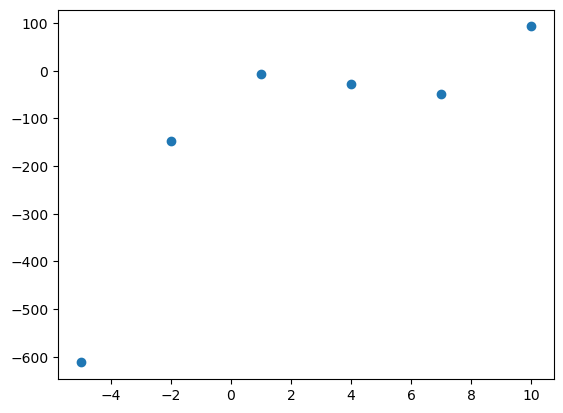

In [3]:
# Plot known points
plt.plot(G,F,'o',label='known points');
print(F)

In [23]:
# construct interpolation function
interp_func = interpolate.RegularGridInterpolator((G,),  # points to interpolate (here it's just 6 points between -5 and 10)
                                                  F,     # point values
                                                  bounds_error=False,
                                                  fill_value=None)

In [24]:
# interpolate based on grid
grid = np.linspace(-7,12,500) # construct grid of 500 points between -7 and 12
interp_values = interp_func(grid)
#interp_values

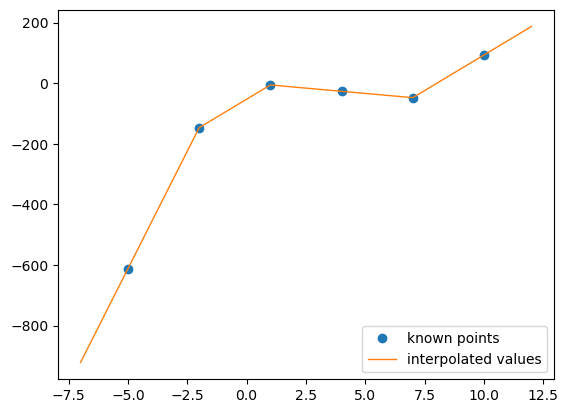

In [6]:
# define figure and axis
plt.plot(G,F,'o',label='known points') # Plot known points
plt.plot(grid,interp_values,'-',lw=1,label='interpolated values') # Plot interpolated values
plt.legend(loc='lower right',facecolor='white',frameon=True) # legend

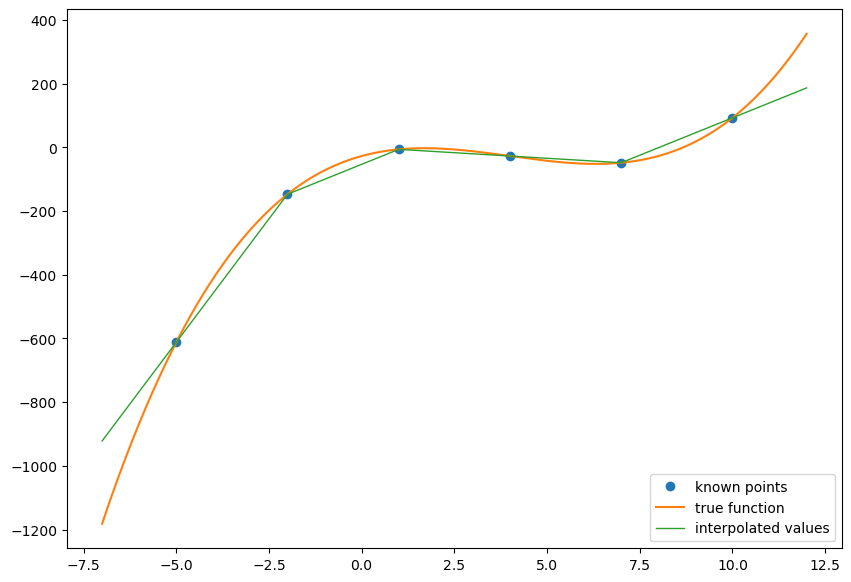

In [7]:
fig = plt.figure(figsize = (10,7)) 
ax = fig.add_subplot(1,1,1)

f_true = f(grid) # find true values to show function
ax.plot(G,F,'o',label='known points') # Plot known points
ax.plot(grid,f_true,label='true function') # Plot true points
ax.plot(grid,interp_values,'-',lw=1,label='interpolated values') # Plot interpolated values
ax.legend(loc='lower right',facecolor='white',frameon=True) # legend

# Example from Problem set 7
This is a hard problem set: covers the toughest part of the exam

Define the following **variables** and **parameters**:

* $m_t$ is cash-on-hand in period $t$
* $c_t$ is consumption in period $t$
* $y_t$ is income in period $t$
* $\Delta \in (0,1)$ is income risk
* $r$ is the interest rate
* $\beta > 0$, $\rho > 1$, $\nu > 0 $, $\kappa > 0$, $\xi > 0$ are utility parameters

In the **second period** the household solves:

$$
\begin{aligned}
v_{2}(m_{2}) &= \max_{c_{2}}\frac{c_{2}^{1-\rho}}{1-\rho}+\nu\frac{(m_{2}-c_{2}+\kappa)^{1-\rho}}{1-\rho} \\
 \text{s.t.} \\
c_{2} & \in [0,m_{2}]
\end{aligned}
$$

In the **first period** the household solves:

$$
\begin{aligned}
v_{1}(m_{1}) & = 
\max_{c_{1}}\frac{c_{1}^{1-\rho}}{1-\rho}+\beta\mathbb{E}_{1}\left[v_2(m_2)\right] \\
\text{s.t.} \\
m_2 &= (1+r)(m_{1}-c_{1})+y_{2} \\
y_{2} &= \begin{cases}
1-\Delta & \text{with prob. }0.5\\
1+\Delta & \text{with prob. }0.5 
\end{cases}\\
c_{1} & \in [0,m_{1}]\\
\end{aligned}
$$

The **basic functions** are:

In [8]:
import numpy as np
import scipy as sp
from scipy import linalg
from scipy import optimize
from scipy import interpolate
import sympy as sm

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def utility(c,rho):
    return c**(1-rho)/(1-rho)

def bequest(m,c,nu,kappa,rho):
    return nu*(m-c+kappa)**(1-rho)/(1-rho)

def v2(c2,m2,rho,nu,kappa):
    return utility(c2,rho) + bequest(m2,c2,nu,kappa,rho)

def v1(c1,m1,rho,beta,r,Delta,v2_interp):
    
    # a. v2 value, if low income
    m2_low = (1+r)*(m1-c1) + 1-Delta
    v2_low = v2_interp([m2_low])[0]
    
    # b. v2 value, if high income
    m2_high = (1+r)*(m1-c1) + 1+Delta
    v2_high = v2_interp([m2_high])[0]
    
    # c. expected v2 value
    v2 = 0.5*v2_low + 0.5*v2_high
    
    # d. total value
    return utility(c1,rho) + beta*v2

C:\Users\simon\AppData\Local\Temp\ipykernel_11924\2807183104.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


The **solution functions** are:

In [9]:
def solve_period_2(rho,nu,kappa,Delta):

    # a. grids
    m2_vec = np.linspace(1e-8,5,500)
    v2_vec = np.empty(500)
    c2_vec = np.empty(500)

    # b. solve for each m2 in grid
    for i,m2 in enumerate(m2_vec):

        # i. objective
        obj = lambda x: -v2(x[0],m2,rho,nu,kappa)

        # ii. initial value (consume half)
        x0 = m2/2

        # iii. optimizer
        result = optimize.minimize(obj,[x0],method='L-BFGS-B',bounds=((1e-12,m2),))

        # iv. save
        v2_vec[i] = -result.fun
        c2_vec[i] = result.x[0]
        
    return m2_vec,v2_vec,c2_vec

def solve_period_1(rho,beta,r,Delta,v1,v2_interp):

    # a. grids
    m1_vec = np.linspace(1e-8,4,100) 
    v1_vec = np.empty(100)
    c1_vec = np.empty(100)
    
    # b. solve for each m1 in grid
    for i,m1 in enumerate(m1_vec):
        
        # i. objective
        obj = lambda x: -v1(x[0],m1,rho,beta,r,Delta,v2_interp)
        
        # ii. initial guess (consume half)
        x0 = m1/2
        
        # iii. optimize
        result = optimize.minimize(obj,[x0],method='L-BFGS-B',bounds=((1e-12,m1),))
        
        # iv. save
        v1_vec[i] = -result.fun
        c1_vec[i] = result.x[0]
     
    return m1_vec,v1_vec,c1_vec

**Question A:** Find optimal consumption in the first period as funcition of cash-on-hand, and plot it.

In [10]:
rho = 8
kappa = 0.5
nu = 0.1
r = 0.04
beta = 0.94
Delta = 0.5

# b. solve
def solve(rho,beta,r,Delta,nu,kappa,v1):
    
    # a. solve period 2
    m2_vec,v2_vec,c2_vec = solve_period_2(rho,nu,kappa,Delta)
    
    # b. construct interpolator
    v2_interp = interpolate.RegularGridInterpolator((m2_vec,), v2_vec,
                                                    bounds_error=False,fill_value=None)
    
    # b. solve period 1
    m1_vec,v1_vec,c1_vec = solve_period_1(rho,beta,r,Delta,v1,v2_interp)
    
    return m1_vec,c1_vec

m1_vec,c1_vec = solve(rho,beta,r,Delta,nu,kappa,v1)

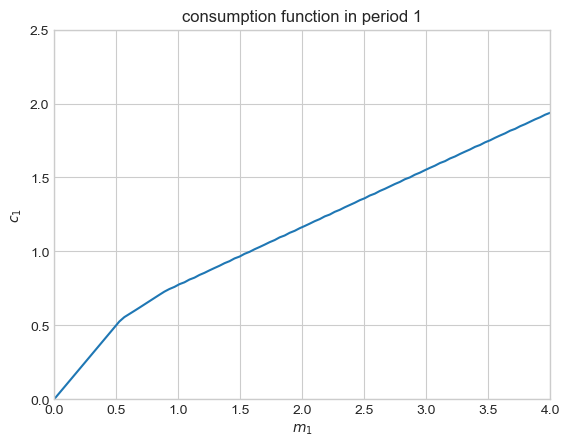

In [11]:
# c. plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(m1_vec,c1_vec)
ax.set_xlabel('$m_1$')
ax.set_ylabel('$c_1$')
ax.set_title('consumption function in period 1')
ax.set_xlim([0,4])
ax.set_ylim([0,2.5]);

### Lets break it down. First we solve for period 2:

In [12]:
# a. solve period 2
m2_vec,v2_vec,c2_vec = solve_period_2(rho,nu,kappa,Delta)

m2_vec is a vector with values between 0 and 5, this is the possible "cash on hands", in period 2

In [13]:
print(m2_vec[:5]) # first 5 entries for m2_vec
print("\n") # space
print(m2_vec[-5:]) # last 5 entries for m2_vec

[1.00000000e-08 1.00200501e-02 2.00400901e-02 3.00601302e-02
 4.00801702e-02]


[4.95991984 4.96993988 4.97995992 4.98997996 5.        ]


v2_vec is a vector with the utility for each chosen m2

In [14]:
print(v2_vec[:5]) # first 5 entries for v2_vec
print("\n") # space
print(v2_vec[-5:]) # last 5 entries for v2_vec

[-1.82857143e+57 -1.40868121e+13 -1.10053604e+11 -6.44118779e+09
 -8.59795283e+08]


[-8.68345574e-05 -8.57271911e-05 -8.46359345e-05 -8.35605246e-05
 -8.25007029e-05]


Since v2_vec only covers 100 points, and there are an infinite number of solution, we interpolate to cover everything:

In [15]:
# b. construct interpolator
v2_interp = interpolate.RegularGridInterpolator((m2_vec,), v2_vec,
                                                bounds_error=False,fill_value=None)

Now we can find the utility in period 2 for every value of m, lets try 6:

In [16]:
v2_interp([6])

array([2.32695014e-05])

### Now we are ready for period 1

In [17]:
# b. solve period 1
m1_vec,v1_vec,c1_vec = solve_period_1(rho,beta,r,Delta,v1,v2_interp)

Now we can find the possible utility outcomes, when $m_1$ is between 0 and 4:

In [18]:
print(v1_vec[:5]) # first 5 entries for v1_vec
print("\n") # space
print(v1_vec[-5:]) # last 5 entries for v1_vec

[-1.82857143e+57 -8.12695104e+08 -6.34919543e+06 -3.71612633e+05
 -4.96125455e+04]


[-0.00453793 -0.00428377 -0.0040461  -0.00382327 -0.00361444]
